<a href="https://colab.research.google.com/github/AmbaliAnjane/DataScientist-Analyst_projects/blob/main/Copy_of_housePRICEprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [39]:
test1=pd.read_csv("/content/sample_submission.csv")
test1

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [40]:
train1=pd.read_csv("/content/train.csv")
train1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [41]:
train1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
train1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

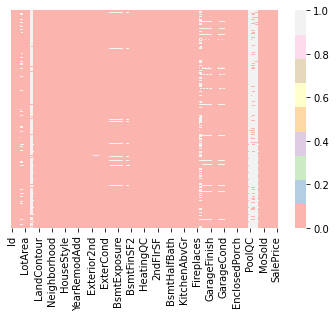

In [43]:
sns.heatmap(train1.isnull(),yticklabels=False,cbar=True,cmap='Pastel1')

missing values are availble in huge 
***performing missing value treatement***

In [44]:
train1.drop(['PoolQC'],axis=1,inplace=True)

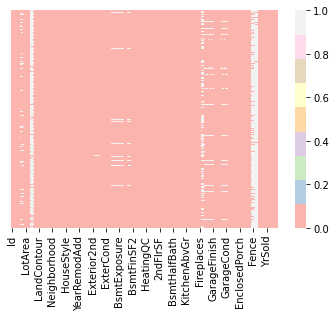

In [45]:
sns.heatmap(train1.isnull(),yticklabels=False,cbar=True,cmap='Pastel1')

In [46]:
train1.drop(['Fence'],axis=1,inplace=True)

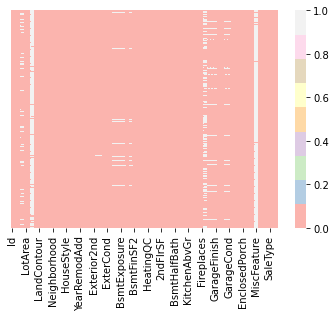

In [47]:
sns.heatmap(train1.isnull(),yticklabels=False,cbar=True,cmap='Pastel1')

In [48]:
train1['Alley'].isnull().sum()

1369

In [49]:
train1.shape

(1460, 79)

In [50]:
train1.drop(['MiscFeature'],axis=1,inplace=True)

In [51]:
train1.drop(['Alley'],axis=1,inplace=True)

have removed columns with lots of missing values 

In [52]:
train1['LotFrontage'].isnull().sum()

259

In [53]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')

In [18]:

imr = imputer.fit(train1[['LotFrontage']])
train1['LotFrontage'] = imr.transform(train1[['LotFrontage']]).ravel()

In [54]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imr=imputer.fit(train1[['GarageType']])
train1['GarageType']=imr.transform(train1[['GarageType']]).ravel()

In [55]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imr=imputer.fit(train1[['GarageCond']])
train1['GarageCond']=imr.transform(train1[['GarageCond']]).ravel()

In [56]:
train1.drop(['GarageYrBlt'],axis=1,inplace=True)

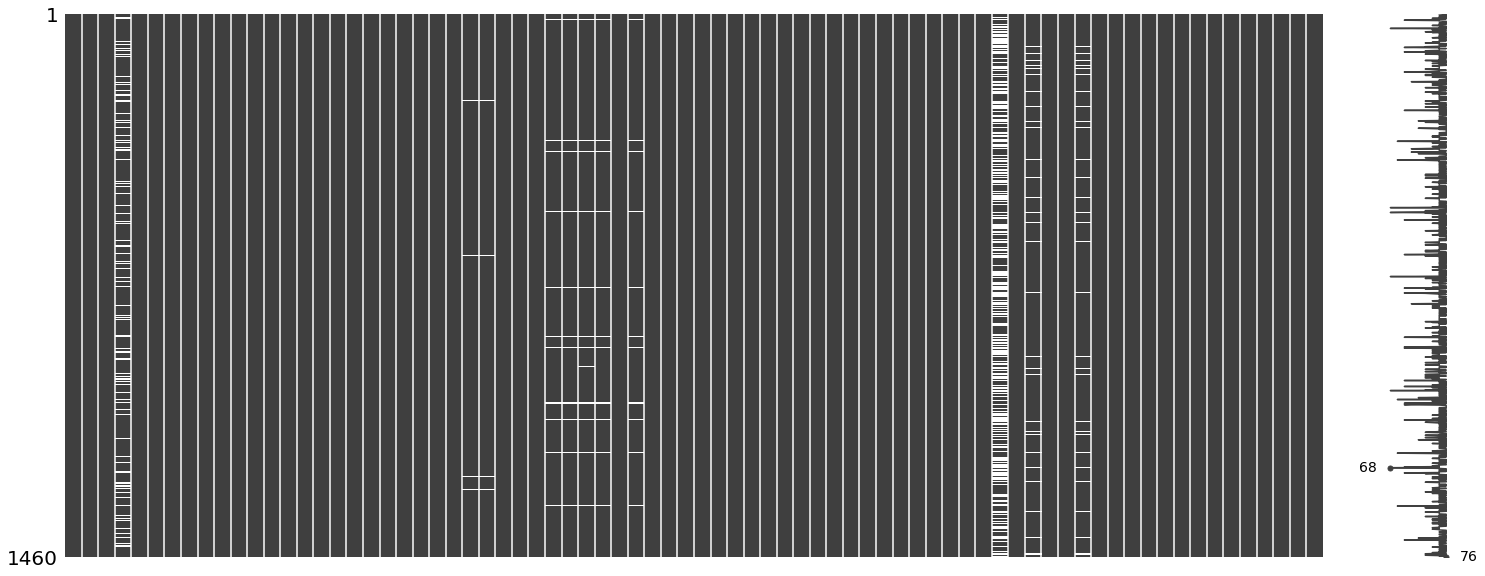

In [57]:
import missingno as mn
mn.matrix(train1)

In [58]:
train1.drop(['FireplaceQu'],axis=1,inplace=True)

In [59]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imr=imputer.fit(train1[['GarageQual']])
train1['GarageQual']=imr.transform(train1[['GarageQual']]).ravel()

In [60]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imr=imputer.fit(train1[['GarageFinish']])
train1['GarageFinish']=imr.transform(train1[['GarageFinish']]).ravel()

we have done with maximum of missing values
building model 
1>decision tree regressor

In [62]:
train1.shape

(1460, 75)

In [83]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2, random_state = 0)


In [84]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(train1['MSZoning'])
#appending the label array to datafram and dropping previuous
train1.drop(["MSZoning"],axis=1,inplace=True)
train1['MSZoning']=label
train1

,Id,MSSubClass,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street,LotShape,MSZoning
0,1,60,65.0,8450,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,2,2008,WD,Normal,208500,1,3,3
1,2,20,80.0,9600,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,5,2007,WD,Normal,181500,1,3,3
2,3,60,68.0,11250,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,9,2008,WD,Normal,223500,1,0,3
3,4,70,60.0,9550,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,2,2006,WD,Abnorml,140000,1,0,3
4,5,60,84.0,14260,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,12,2008,WD,Normal,250000,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,0,0,8,2007,WD,Normal,175000,1,3,3
1456,1457,20,85.0,13175,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,0,0,2,2010,WD,Normal,210000,1,3,3
1457,1458,70,66.0,9042,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,0,2500,5,2010,WD,Normal,266500,1,3,3
1458,1459,20,68.0,9717,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,0,0,4,2010,WD,Normal,142125,1,3,3


In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(train1['Street'])
#appending the label array to datafram and dropping previuous
train1.drop(["Street"],axis=1,inplace=True)
train1['Street']=label


In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(train1['LotShape'])
#appending the label array to datafram and dropping previuous
train1.drop(["LotShape"],axis=1,inplace=True)
train1['LotShape']=label


In [109]:
train1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSo

In [146]:
X = train1.drop(['SalePrice'], axis=1)

y = train1['SalePrice']


In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size = 0.20, random_state = 0)

In [163]:
x_train=pd.get_dummies(data=x_train,drop_first=True)
x_test=pd.get_dummies(data=x_test,drop_first=True)

In [127]:
#from sklearn import preprocessing

#categorical = ['LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle'
#,'RoofMatl','Exterior1st','Exterior2nd',' MasVnrType','ExterQual','ExterCond','Foundation', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',' Functional','GarageFinish','GarageQual','GarageCond','PavedDrive']

#for feature in categorical:
        #le = preprocessing.LabelEncoder()
        #x_train[feature] = le.fit_transform(x_train[feature])
        #x_test[feature] = le.transform(x_test[feature])

In [164]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [152]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion="friedman_mse",splitter = 'best')   
regressor.fit(x_train, y_train)


ValueError: ignored